RECOMMENDATION SYSTEM FOR CARS ACCESSORIES:
A well developed recommendation system will help businesses improve their shopper's experience on website and result in better customer acquisition and retention.

The recommendation system, I have designed below is based on the journey of a new customer from the time he/she lands on the business’s website for the first time to when he/she makes repeat purchases.

The recommendation system is designed in 3 parts based on the business context:

Recommendation system part I: Product pupularity based system targetted at new customers

Recommendation system part II: Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items

Recommendation system part III: When a business is setting up its e-commerce website for the first time withouT any product rating

When a new customer without any previous purchase history visits the e-commerce website for the first time, he/she is recommended the most popular products sold on the company's website. Once, he/she makes a purchase, the recommendation system updates and recommends other products based on the purchase history and ratings provided by other users on the website. The latter part is done using collaborative filtering techniques.

RECOMMENDATION SYSTEM-PART1:
Product popularity based recommendation system targeted at new customers:
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
realtime_ecommerce = pd.read_csv('realtime_ecommerce_dataset.csv')
realtime_ecommerce = realtime_ecommerce.dropna()
realtime_ecommerce.head()

,user_id,product_id,rating,timestamp,age,gender,location,category,price
0,User286,Product1410,4,2023-09-17 11:34:24,22,Male,City B,Books,735.08
1,User173,Product7999,2,2023-11-27 03:59:23,50,Female,City A,Toys,728.93
2,User804,Product8518,1,2023-04-21 13:58:03,31,Other,City C,Electronics,618.96
3,User775,Product7742,3,2023-09-13 03:53:41,24,Other,City C,Books,523.13
4,User760,Product9586,1,2023-09-23 21:47:02,49,Female,City C,Toys,204.72


In [ ]:
realtime_ecommerce.shape

(50000, 9)

In [ ]:
popular_products = pd.DataFrame(realtime_ecommerce.groupby('product_id')['rating'].count())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

,rating
product_id,
Product9526,17
Product6713,16
Product6139,15
Product2834,15
Product6670,15
Product9879,15
Product8221,14
Product7970,14
Product399,14


<Axes: xlabel='product_id'>

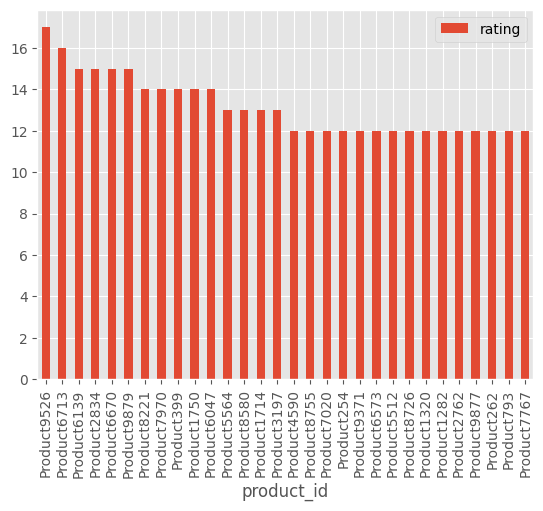

In [ ]:
most_popular.head(30).plot(kind = "bar")

<Axes: xlabel='product_id'>

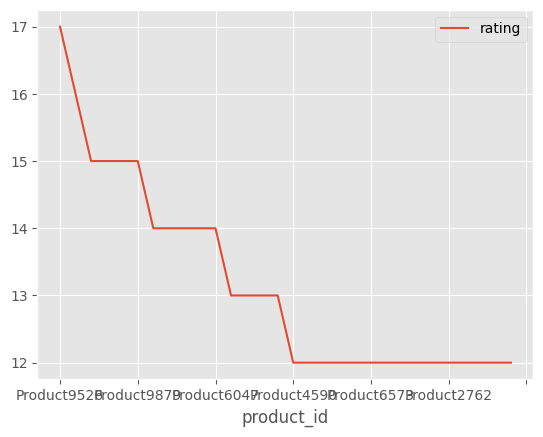

In [ ]:
most_popular.head(30).plot(kind = "line")

In [ ]:
realtime_ecommerce1 = realtime_ecommerce.head(10000)

In [ ]:
ratings_utility_matrix = realtime_ecommerce1.pivot_table(values='rating', index='user_id', columns='product_id', fill_value=0)
ratings_utility_matrix.head()

product_id,Product1,Product10,Product100,Product10000,Product1001,Product1004,Product1005,Product1006,Product1008,Product1009,...,Product9988,Product9989,Product999,Product9990,Product9992,Product9994,Product9996,Product9997,Product9998,Product9999
user_id,,,,,,,,,,,,,,,,,,,,,
User1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
User10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
User100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
User1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
User101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(1000, 6371)

In [ ]:
X = ratings_utility_matrix.T
X.head()

user_id,User1,User10,User100,User1000,User101,User102,User103,User104,User105,User106,...,User990,User991,User992,User993,User994,User995,User996,User997,User998,User999
product_id,,,,,,,,,,,,,,,,,,,,,
Product1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Product1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(6371, 1000)

In [ ]:
X1 = X

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(6371, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(6371, 6371)

In [ ]:
X.index[99]

'Product1139'

In [ ]:
i = "Product1139"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(6371,)

<ipython-input-88-e34bae6075f3>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-88-e34bae6075f3>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


          rating       age     price
rating  1.000000 -0.002227 -0.001981
age    -0.002227  1.000000 -0.000947
price  -0.001981 -0.000947  1.000000


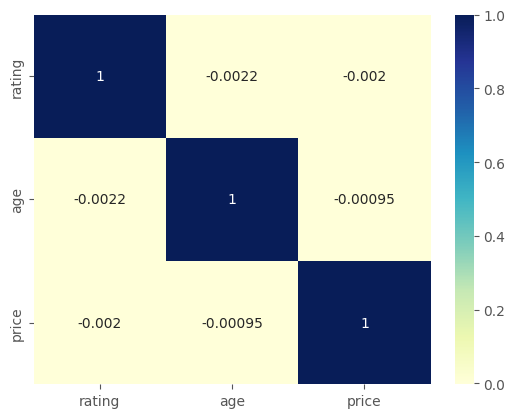

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# import file with data
data = pd.read_csv("realtime_ecommerce_dataset.csv")

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend[0:9]

['Product1076',
 'Product1374',
 'Product2153',
 'Product2779',
 'Product3115',
 'Product3276',
 'Product3470',
 'Product3933',
 'Product4401']

Recommendation System - Part II
Model-based collaborative filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

Utility Matrix based on products sold and user reviews
Utility Matrix

An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparce as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [ ]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

car accessories dataset:
Item to Item based recommendation system based on product description

In [ ]:
car = pd.read_csv('car.csv')
car.shape

(1272, 9)

In [ ]:
car= car.dropna()
car.shape
car.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,SOFTSPUN Microfiber Cloth - 4 pcs - 40x40 cms ...,car & motorbike,All Car & Motorbike Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/SOFTSPUN-Microfiber-Clea...,4.3,"78,970",₹269,₹604
1,Involve Your Senses One Musk Organic Car Perfu...,car & motorbike,All Car & Motorbike Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Involve-Your-Senses-IONE...,3.8,"17,245",₹307,₹399
2,ShineXPro Microfiber Car Cleaning Cloth - OG S...,car & motorbike,All Car & Motorbike Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/ShineXPro-Microfiber-Car...,4.3,"5,067",₹499,₹549
3,"pTron Bullet Pro 36W PD Quick Charger, 3 Port ...",car & motorbike,All Car & Motorbike Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PTron-Bullet-Pro-Lightwe...,4.0,"15,910",₹349,"₹1,299"
4,"Pidilite WD-40, Multipurpose Car care Spray, 4...",car & motorbike,All Car & Motorbike Products,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Pidilite-Multiple-Mainte...,4.3,"34,750",₹290,₹418


In [ ]:
product_descriptions1 = car.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["ratings"].head(10)

0    4.3
1    3.8
2    4.3
3    4.0
4    4.3
5    4.4
6    3.9
7    3.5
8    4.3
9    4.1
Name: ratings, dtype: object

In [ ]:
product_descriptions1 = car.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["sub_category"].head(10)

0    All Car & Motorbike Products
1    All Car & Motorbike Products
2    All Car & Motorbike Products
3    All Car & Motorbike Products
4    All Car & Motorbike Products
5    All Car & Motorbike Products
6    All Car & Motorbike Products
7    All Car & Motorbike Products
8    All Car & Motorbike Products
9    All Car & Motorbike Products
Name: sub_category, dtype: object

In [ ]:
product_descriptions1 = car.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["actual_price"].head(10)

0      ₹604
1      ₹399
2      ₹549
3    ₹1,299
4      ₹418
5      ₹869
6      ₹499
7       ₹99
8      ₹795
9      ₹683
Name: actual_price, dtype: object

feature extraction from product descriptions

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["name"])
X1

<500x2258 sparse matrix of type '<class 'numpy.float64'>'
	with 6620 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


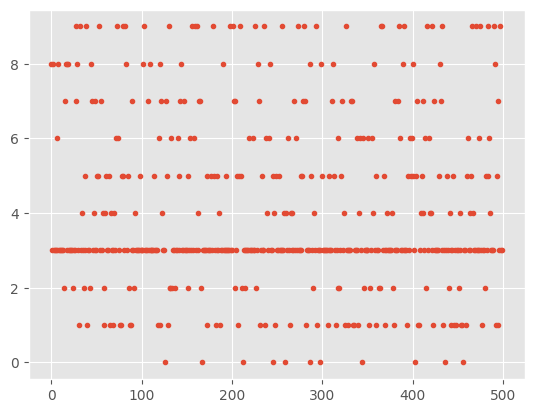

In [ ]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
feature_names = vectorizer.get_feature_names_out()

for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % feature_names[ind])
    print()


Top terms per cluster:
Cluster 0:
 cover
 waterproof
 resistant
 key
 body
 bike
 dustproof
 protection
 heat
 350

Cluster 1:
 led
 light
 pressure
 bar
 washer
 high
 inch
 universal
 car
 bikes

Cluster 2:
 car
 cars
 air
 wash
 heavy
 guard
 door
 freshener
 duty
 edge

Cluster 3:
 face
 protection
 sun
 men
 sleeves
 gloves
 arm
 black
 women
 helmet

Cluster 4:
 phone
 holder
 mirror
 body
 car
 mount
 mobile
 360
 bicycle
 cover

Cluster 5:
 tyre
 car
 tubeless
 accessories
 100
 polish
 bike
 air
 inflator
 rear

Cluster 6:
 charger
 compatible
 key
 car
 charging
 usb
 port
 12v
 fast
 xuv

Cluster 7:
 seat
 leather
 car
 holder
 storage
 organizer
 mt
 15
 pack
 auto

Cluster 8:
 microfiber
 cleaning
 brush
 cloth
 duster
 car
 gsm
 multipurpose
 lint
 home

Cluster 9:
 vega
 sticker
 helmet
 black
 chrome
 dull
 3d
 emblem
 decal
 logo



In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["red"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["windshield"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["glass"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [ ]:
print("Cluster ID:")
Y = vectorizer.transform(["uv"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[3]
